In [1]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import gmaps
import random

url= "https://data.lacity.org/resource/2nrs-mtv8.json"
respose =requests.get(url).json()

In [2]:
from config import g_key
gmaps.configure(api_key=g_key)

In [3]:
# Create dataframe
crime_df = pd.read_csv('../../Resources/crime_data.csv')
crime_df.dropna(inplace = True, how="all") 
crime_df    

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,201220752,09/16/2020 12:00:00 AM,09/16/2020 12:00:00 AM,1230,12,77th Street,1259,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,NaN,NaN,NaN,700 E 73RD ST,NaN,33.9739,-118.2630
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301481,211208872,03/19/2021 12:00:00 AM,03/19/2021 12:00:00 AM,1105,12,77th Street,1218,1,510,VEHICLE - STOLEN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,58TH ST,FIGUEROA ST,33.9897,-118.2827
301482,210506531,03/04/2021 12:00:00 AM,03/04/2021 12:00:00 AM,2210,5,Harbor,564,2,434,FALSE IMPRISONMENT,...,AA,Adult Arrest,434.0,NaN,NaN,NaN,200 W 2ND ST,NaN,33.7424,-118.2814
301483,211710505,07/09/2021 12:00:00 AM,07/09/2021 12:00:00 AM,1050,17,Devonshire,1798,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,8800 DEMPSEY AV,NaN,34.2302,-118.4775
301484,210312887,07/12/2021 12:00:00 AM,07/12/2021 12:00:00 AM,1200,3,Southwest,363,1,350,"THEFT, PERSON",...,IC,Invest Cont,350.0,NaN,NaN,NaN,CRENSHAW BL,STOCKER ST,34.0088,-118.3351


In [4]:
# focusing only on 2020
crime_df["DATE OCC"]=pd.to_datetime(crime_df["DATE OCC"])
# Creating new columns for year 
crime_df["Year Occured"] = [date.year for date in crime_df["DATE OCC"]]
crime_df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,Year Occured
0,10304468,01/08/2020 12:00:00 AM,2020-01-08,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978,2020
1,190101086,01/02/2020 12:00:00 AM,2020-01-01,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545,2020
2,201220752,09/16/2020 12:00:00 AM,2020-09-16,1230,12,77th Street,1259,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,Invest Cont,745.0,NaN,NaN,NaN,700 E 73RD ST,NaN,33.9739,-118.2630,2020
3,191501505,01/01/2020 12:00:00 AM,2020-01-01,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019,2020
4,191921269,01/01/2020 12:00:00 AM,2020-01-01,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468,2020


In [5]:
# focusing on only the year 2020
twenty_twenty_crime=crime_df.loc[crime_df["Year Occured"]==2020,:]
twenty_twenty_crime

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,Year Occured
0,10304468,01/08/2020 12:00:00 AM,2020-01-08,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978,2020
1,190101086,01/02/2020 12:00:00 AM,2020-01-01,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545,2020
2,201220752,09/16/2020 12:00:00 AM,2020-09-16,1230,12,77th Street,1259,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,Invest Cont,745.0,NaN,NaN,NaN,700 E 73RD ST,NaN,33.9739,-118.2630,2020
3,191501505,01/01/2020 12:00:00 AM,2020-01-01,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019,2020
4,191921269,01/01/2020 12:00:00 AM,2020-01-01,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197062,200814793,10/02/2020 12:00:00 AM,2020-10-02,1330,8,West LA,853,1,440,THEFT PLAIN - PETTY ($950 & UNDER),...,Adult Other,440.0,998.0,NaN,NaN,11400 SANTA MONICA BL,NaN,34.0457,-118.4511,2020
197063,210612830,07/17/2021 12:00:00 AM,2020-12-15,1200,6,Hollywood,659,1,310,BURGLARY,...,Invest Cont,310.0,NaN,NaN,NaN,5100 W SUNSET BL,NaN,34.0981,-118.3010,2020
197064,200315957,08/18/2020 12:00:00 AM,2020-08-18,1130,3,Southwest,362,2,624,BATTERY - SIMPLE ASSAULT,...,Adult Arrest,624.0,NaN,NaN,NaN,4800 OBAMA BL,NaN,34.0214,-118.3486,2020
197065,211009262,06/20/2021 12:00:00 AM,2020-07-11,1000,10,West Valley,1065,1,310,BURGLARY,...,Invest Cont,310.0,NaN,NaN,NaN,18000 VENTURA BL,NaN,34.1675,-118.5226,2020


In [6]:
# focusing on only the area name and tyoe of crime
filtered_2020_dataframe = twenty_twenty_crime. filter(['AREA NAME', 'Crm Cd Desc'])
filtered_2020_dataframe

,AREA NAME,Crm Cd Desc
0,Southwest,BATTERY - SIMPLE ASSAULT
1,Central,BATTERY - SIMPLE ASSAULT
2,77th Street,VANDALISM - MISDEAMEANOR ($399 OR UNDER)
3,N Hollywood,VANDALISM - MISDEAMEANOR ($399 OR UNDER)
4,Mission,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA..."
...,...,...
197062,West LA,THEFT PLAIN - PETTY ($950 & UNDER)
197063,Hollywood,BURGLARY
197064,Southwest,BATTERY - SIMPLE ASSAULT
197065,West Valley,BURGLARY


In [7]:
# new_dataframe=crime_df.loc[crime_df["AREA NAME"]== "Southwest"]
# crimes_dataframe=new_dataframe["Crm Cd Desc"].value_counts()
# display(crimes_dataframe.to_string())

In [8]:
# Create dataframe
crimes_2019_df = pd.read_csv('../../Resources/2019_crime_data.csv')
crimes_2019_df.dropna(inplace = True, how="all") 
crimes_2019_df

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Crm Cd,Crm Cd Desc,Vict Age,...,Vict Descent,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,LOCATION,Cross Street,LAT,LON
0,190805874,2/12/2019 0:00,2/12/2019 0:00,1900,8,West LA,857,310,BURGLARY,34,...,P,SINGLE FAMILY DWELLING,NaN,NaN,IC,Invest Cont,1500 BEVERWIL DR,NaN,34.0524,-118.3986
1,191213477,5/12/2019 0:00,5/12/2019 0:00,200,12,77th Street,1203,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",24,...,H,"VEHICLE, PASSENGER/TRUCK",NaN,NaN,IC,Invest Cont,1700 W 45TH ST,NaN,34.0028,-118.3089
2,190409679,5/10/2019 0:00,5/10/2019 0:00,330,4,Hollenbeck,489,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),24,...,H,PARKING LOT,304.0,CLUB/BAT,IC,Invest Cont,1300 S SOTO ST,NaN,34.0263,-118.2196
3,191510263,5/1/2019 0:00,4/30/2019 0:00,1610,15,N Hollywood,1599,624,BATTERY - SIMPLE ASSAULT,53,...,O,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,2800 MONTCALM AV,NaN,34.1223,-118.3563
4,190320119,8/30/2019 0:00,8/30/2019 0:00,1815,3,Southwest,354,930,CRIMINAL THREATS - NO WEAPON DISPLAYED,49,...,B,SINGLE FAMILY DWELLING,511.0,VERBAL THREAT,IC,Invest Cont,2700 OBAMA BL,NaN,34.0222,-118.3227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217529,191904534,1/12/2019 0:00,1/12/2019 0:00,50,19,Mission,1951,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",42,...,H,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",500.0,UNKNOWN WEAPON/OTHER WEAPON,AO,Adult Other,15400 CHATSWORTH ST,NaN,34.2646,-118.4673
217530,190325632,12/1/2019 0:00,11/30/2019 0:00,1900,3,Southwest,331,330,BURGLARY FROM VEHICLE,34,...,H,DRIVEWAY,NaN,NaN,IC,Invest Cont,2900 S RIMPAU BL,NaN,34.0278,-118.3508
217531,191321935,11/7/2019 0:00,10/3/2019 0:00,100,13,Newton,1364,354,THEFT OF IDENTITY,30,...,B,SINGLE FAMILY DWELLING,NaN,NaN,IC,Invest Cont,4900 S CENTRAL AV,NaN,33.9989,-118.2565
217532,190912178,6/12/2019 0:00,6/11/2019 0:00,600,9,Van Nuys,909,626,INTIMATE PARTNER - SIMPLE ASSAULT,34,...,W,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,7400 WOODMAN AV,NaN,34.2049,-118.4313


In [9]:
new_dataframe=twenty_twenty_crime.loc[twenty_twenty_crime["AREA NAME"]== "77th Street"]
crimes_dataframe=new_dataframe["Crm Cd Desc"].value_counts()
crimes_dataframe.head(10)

VEHICLE - STOLEN                                           1585
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT             1507
INTIMATE PARTNER - SIMPLE ASSAULT                          1017
BATTERY - SIMPLE ASSAULT                                    984
ROBBERY                                                     838
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)     820
VANDALISM - MISDEAMEANOR ($399 OR UNDER)                    580
BURGLARY FROM VEHICLE                                       530
BURGLARY                                                    453
THEFT PLAIN - PETTY ($950 & UNDER)                          432
Name: Crm Cd Desc, dtype: int64

In [10]:
new_2019_dataframe=crimes_2019_df.loc[crimes_2019_df["AREA NAME"]== "77th Street"]
crimes_2019_dataframe=new_2019_dataframe["Crm Cd Desc"].value_counts()
crimes_2019_dataframe.head(10)

VEHICLE - STOLEN                                           1311
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT             1258
BATTERY - SIMPLE ASSAULT                                   1155
INTIMATE PARTNER - SIMPLE ASSAULT                          1132
ROBBERY                                                    1012
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)     789
BURGLARY FROM VEHICLE                                       692
BURGLARY                                                    652
THEFT PLAIN - PETTY ($950 & UNDER)                          614
VANDALISM - MISDEAMEANOR ($399 OR UNDER)                    611
Name: Crm Cd Desc, dtype: int64

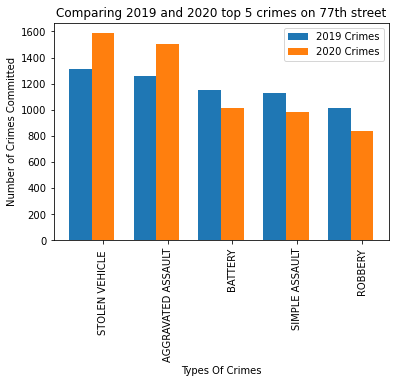

In [24]:
# creating your lists
num_of__2019_crimes = [1311, 1258, 1155, 1132, 1012]
num_of_2020_crimes = [1585, 1507, 1017, 984, 838]
# create a new dataframe with lists
new_df = pd.DataFrame({

    'num_of__2019_crimes': num_of__2019_crimes,

    'num_of_2020_crimes': num_of_2020_crimes

})

index = np.arange(len(new_df))

bar_width = .35

fig, ax = plt.subplots()

type_2019 = ax.bar(index, new_df["num_of__2019_crimes"], bar_width, label="2019 Crimes")
type_2020 = ax.bar(index+bar_width, new_df["num_of_2020_crimes"], bar_width, label="2020 Crimes")
# set x label
ax.set_xlabel('Types Of Crimes')
# set y label
ax.set_ylabel('Number of Crimes Committed')
# create title
ax.set_title('Comparing 2019 and 2020 top 5 crimes on 77th street')

ax.set_xticks(index + bar_width )
# set categories under bar chart
ax.set_xticklabels(["STOLEN VEHICLE ", "AGGRAVATED ASSAULT", "BATTERY", "SIMPLE ASSAULT", "ROBBERY"])
# show box within the bar chart
ax.legend()
# fix tick labels
plt.xticks(rotation=90)
# show bar chart
plt.show()

In [12]:
new_dataframe=twenty_twenty_crime.loc[twenty_twenty_crime["AREA NAME"]== "Southwest"]
crimes_dataframe=new_dataframe["Crm Cd Desc"].value_counts()
crimes_dataframe.head(10)

BATTERY - SIMPLE ASSAULT                                   1072
VEHICLE - STOLEN                                           1066
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT              749
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)     708
INTIMATE PARTNER - SIMPLE ASSAULT                           677
THEFT PLAIN - PETTY ($950 & UNDER)                          524
THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)             494
BURGLARY FROM VEHICLE                                       489
ROBBERY                                                     486
BURGLARY                                                    444
Name: Crm Cd Desc, dtype: int64

In [13]:
new_2019_dataframe=crimes_2019_df.loc[crimes_2019_df["AREA NAME"]== "Southwest"]
crimes_2019_dataframe=new_2019_dataframe["Crm Cd Desc"].value_counts()
crimes_2019_dataframe.head(10)

BATTERY - SIMPLE ASSAULT                                   1256
THEFT PLAIN - PETTY ($950 & UNDER)                          911
INTIMATE PARTNER - SIMPLE ASSAULT                           873
BURGLARY FROM VEHICLE                                       794
VEHICLE - STOLEN                                            776
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT              758
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)     734
ROBBERY                                                     639
THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)             631
BURGLARY                                                    521
Name: Crm Cd Desc, dtype: int64

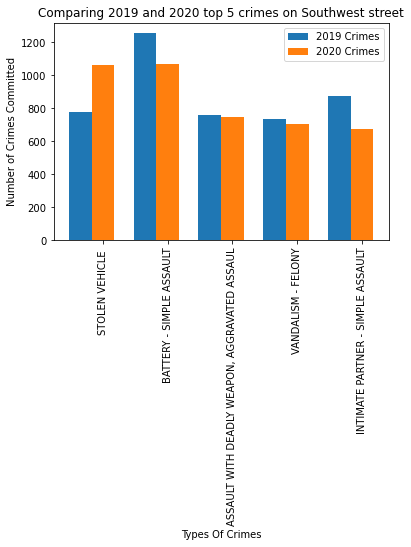

In [25]:
num_of__2019_crimes = [776, 1256, 758, 734, 873]

num_of_2020_crimes = [1066, 1072, 749, 708, 677]

new_df = pd.DataFrame({

    'num_of__2019_crimes': num_of__2019_crimes,

    'num_of_2020_crimes': num_of_2020_crimes

})

index = np.arange(len(new_df))

bar_width = .35

fig, ax = plt.subplots()

type_2019 = ax.bar(index, new_df["num_of__2019_crimes"], bar_width, label="2019 Crimes")

type_2020 = ax.bar(index+bar_width, new_df["num_of_2020_crimes"], bar_width, label="2020 Crimes")

ax.set_xlabel('Types Of Crimes')

ax.set_ylabel('Number of Crimes Committed')

ax.set_title('Comparing 2019 and 2020 top 5 crimes on Southwest street')

ax.set_xticks(index + bar_width )

ax.set_xticklabels(["STOLEN VEHICLE ", "BATTERY - SIMPLE ASSAULT", "ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAUL", "VANDALISM - FELONY", "INTIMATE PARTNER - SIMPLE ASSAULT"])

ax.legend()

plt.xticks(rotation=90)

plt.show()

In [15]:
# outputing specific columns
new_2019_dataframe=crimes_2019_df.loc[crimes_2019_df["AREA NAME"]== "N Hollywood"]
# get the total counts of type of crimes reported
crimes_2019_dataframe=new_2019_dataframe["Crm Cd Desc"].value_counts()
# show top 10 crimes
crimes_2019_dataframe.head(10)

BURGLARY FROM VEHICLE                                       964
BURGLARY                                                    884
THEFT PLAIN - PETTY ($950 & UNDER)                          821
BATTERY - SIMPLE ASSAULT                                    821
VEHICLE - STOLEN                                            742
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)     691
THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)             672
INTIMATE PARTNER - SIMPLE ASSAULT                           599
THEFT OF IDENTITY                                           548
THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD    407
Name: Crm Cd Desc, dtype: int64

In [16]:
# only ouput specific columns
new_dataframe=twenty_twenty_crime.loc[crime_df["AREA NAME"]== "N Hollywood"]
# get the total counts of type of crimes reported
crimes_2020_dataframe=new_dataframe["Crm Cd Desc"].value_counts()
# show top 10 crimes
crimes_2020_dataframe.head(10)

VEHICLE - STOLEN                                           990
BURGLARY FROM VEHICLE                                      820
BURGLARY                                                   768
BATTERY - SIMPLE ASSAULT                                   747
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)    636
THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)            571
THEFT PLAIN - PETTY ($950 & UNDER)                         561
THEFT OF IDENTITY                                          514
INTIMATE PARTNER - SIMPLE ASSAULT                          512
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT             393
Name: Crm Cd Desc, dtype: int64

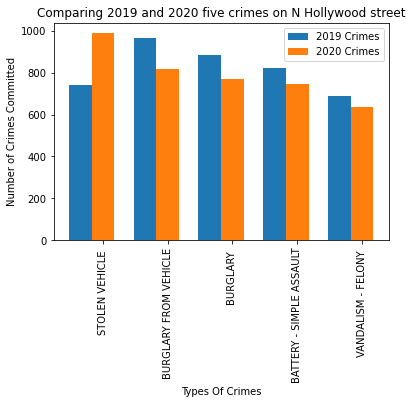

In [20]:
# create lists
num_of__2019_crimes = [742, 964, 884, 821, 691]
num_of_2020_crimes = [990, 820, 768, 747, 636]
# create new dataframe to input lists
new_df = pd.DataFrame({

    'num_of__2019_crimes': num_of__2019_crimes,

    'num_of_2020_crimes': num_of_2020_crimes

})

x_axis= np.arange(len(new_df))
# how big the bars will be
bar_width = .35
fig, ax = plt.subplots()

type_2019 = ax.bar(index, new_df["num_of__2019_crimes"], bar_width, label="2019 Crimes")
type_2020 = ax.bar(index+bar_width, new_df["num_of_2020_crimes"], bar_width, label="2020 Crimes")
# set x label
ax.set_xlabel('Types Of Crimes')
# set y label
ax.set_ylabel('Number of Crimes Committed')
# create title
ax.set_title('Comparing 2019 and 2020 five crimes on N Hollywood street')

ax.set_xticks(index + bar_width )
# set categories under bar chart
ax.set_xticklabels(["STOLEN VEHICLE ", "BURGLARY FROM VEHICLE", "BURGLARY ", "BATTERY - SIMPLE ASSAULT", "VANDALISM - FELONY "])
# show box within the bar chart
ax.legend()
# fix tick labels
# fig.autofmt_xdate()
plt.xticks(rotation=90)
# show bar chart
plt.show()